In [5]:
! pip install tushare

In [92]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [84]:
# 导包
import tushare as ts 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

In [85]:
# 获取数据
tick_data = ts.get_tick_data("600313",date="2020-10-28", src='tt')
tick_data.head()

,time,price,change,volume,amount,type
0,09:25:04,4.54,0.04,2564,1164056,卖盘
1,09:30:03,4.53,-0.01,213,96494,卖盘
2,09:30:06,4.52,-0.01,373,168920,卖盘
3,09:30:09,4.52,0.00,13,5888,卖盘
4,09:30:11,4.52,0.00,125,56505,卖盘


In [86]:
# 当天成交额
tick_data['amount'].sum() 

63661508

In [87]:
# 分组展示
tick_data['amount'].groupby(tick_data['type']).sum()

type
中性盘       37901
买盘     24798205
卖盘     38825402
Name: amount, dtype: int64

In [88]:
# 设置成交量的交易额阈值，筛选出大单、中单、小单
thread_hold = 100000
tick_data[tick_data['amount']>thread_hold].amount.groupby(tick_data['type']).sum()

type
买盘    11297914
卖盘    18453695
Name: amount, dtype: int64

In [89]:
# get_sina_dd接口获取大单交易数据（默认大小等于400手）这个接口似乎已经失效了
data = ts.get_sina_dd('002372', date='2020-10-28')
data

In [106]:
# 筛选出各种单信息
order_dict = {
    'Date': pd.to_datetime(tick_data.time),
    'large_sell': tick_data.apply(lambda x: x.amount if x.type=='卖盘' and x.amount > 50_0000 else np.NaN, axis=1),
    'large_buy': tick_data.apply(lambda x: x.amount if x.type=='买盘' and x.amount > 50_0000 else np.NaN, axis=1),
    'small_sell': tick_data.apply(lambda x: x.amount if x.type=='卖盘' and x.amount <= 50_0000 else np.NaN, axis=1),
    'small_buy': tick_data.apply(lambda x: x.amount if x.type=='买盘' and x.amount <= 50_0000 else np.NaN, axis=1),
    }
order_df = pd.DataFrame(order_dict)
order_df

,Date,large_sell,large_buy,small_sell,small_buy
0,2020-10-29 09:25:04,1164056.0,NaN,NaN,NaN
1,2020-10-29 09:30:03,NaN,NaN,96494.0,NaN
2,2020-10-29 09:30:06,NaN,NaN,168920.0,NaN
3,2020-10-29 09:30:09,NaN,NaN,5888.0,NaN
4,2020-10-29 09:30:11,NaN,NaN,56505.0,NaN
...,...,...,...,...,...
2300,2020-10-29 14:56:48,NaN,NaN,NaN,46725.0
2301,2020-10-29 14:56:54,NaN,NaN,NaN,8890.0
2302,2020-10-29 14:56:57,NaN,NaN,NaN,8010.0
2303,2020-10-29 14:57:01,NaN,NaN,20441.0,NaN


(0.0, 600000.0)

Text(0.5, 0, 'Date')

Text(0, 0.5, 'amount')

Text(0.5, 1.0, 'money in and out')

[]

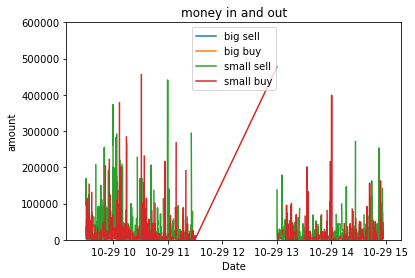

In [108]:
# 画图
fig, ax = plt.subplots()  # 创建图形（画布）和坐标轴
ax.plot(order_df.Date, order_df.large_sell, label='big sell')
ax.plot(order_df.Date, order_df.large_buy, label='big buy')
ax.plot(order_df.Date, order_df.small_sell, linestyle='-',label='small sell')
ax.plot(order_df.Date, order_df.small_buy, label='small buy')
ax.set_ylim(0,600_000)
ax.set_xlabel("Date")
ax.set_ylabel("amount")
ax.legend()
ax.set_title("money in and out")

plt.plot()
plt.show()

## 根据大单可以找到主力资金动向，从而作为下一步操作的指导